In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/california-housing-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Adding Dataset

In [15]:
house=pd.read_csv("/kaggle/input/california-housing-data/housing.csv")

## Checking Input

In [16]:
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [22]:
house.isna().sum()
house=house.dropna()


## Craeting X,Y

In [23]:
house=house.drop("ocean_proximity",axis=1)

KeyError: "['ocean_proximity'] not found in axis"

In [ ]:
house.corr()

In [25]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1,random_state=42)
iso.fit(house)
outlier=iso.predict(house)
house['out']=outlier
print(house.head())
housenew=house[house['out']==-1]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  out  
0       322.0       126.0         8.3252            452600.0   -1  
1      2401.0      1138.0         8.3014            358500.0   -1  
2       496.0       177.0         7.2574            352100.0    1  
3       558.0       219.0         5.6431            341300.0    1  
4       565.0       259.0         3.8462            342200.0    1  


Scaling DATA


In [26]:
features=["housing_median_age","total_rooms","median_income","households"]
x=housenew[features]
y=housenew["median_house_value"]

In [27]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)


In [28]:
from sklearn.preprocessing import PolynomialFeatures
model_poly=PolynomialFeatures(degree=3)
x=model_poly.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500,random_state=0)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

model2=Ridge(alpha=0.9)
model2.fit(xtrain,ytrain)

Ridge(alpha=0.9)

In [31]:
r2=r2_score(ytest,ypred)
error=metrics.mean_squared_error(ypred,ytest)
r2




0.7098501657558054

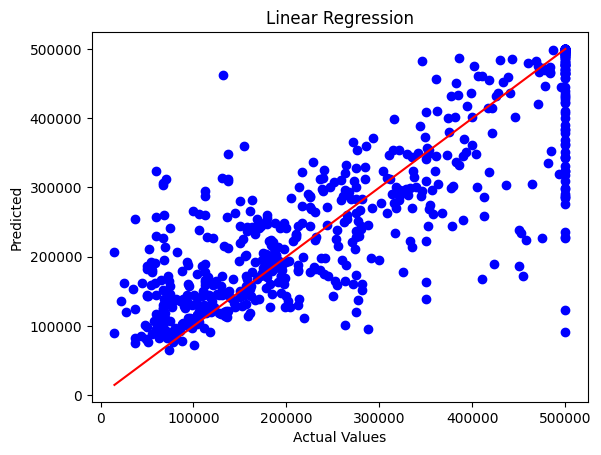

In [32]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred,c="blue",label="training data")
plt.plot([min(y),max(y)],[min(y),max(y)],c="red",label="Regression line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

## Refining Data
